In [1]:
import numpy as np 
import pandas as pd

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "advertising.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ashydv/advertising-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipykernel_13/1311316381.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [3]:
class HMLinearRegression:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.weights = None
        self.bias = None

    def _normalize(self, X):
        
        return (X - self.mean) / self.std
        
    def fit(self, X, y, epochs=1000, verbose=0):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        X = self._normalize(X)

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            error = y_predicted - y

            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            if verbose and epoch % 100 == 0:
                loss = (1 / n_samples) * np.sum(error ** 2)
                print(f"Epoch {epoch}, Loss: {loss}")


    def predict(self, X):
        #ŷ = w * x + b
        X = self._normalize(X)
        return np.dot(X, self.weights) + self.bias

In [4]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.optimizers import SGD

import matplotlib.pyplot as plt


2025-05-05 23:43:28.998421: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746488609.251768      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746488609.331972      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
y = df["Sales"]
x = df.drop("Sales", axis=1)

print(df.shape)
x.head()

(200, 4)


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
model = Sequential()

x_train = np.array(x_train).astype(np.float32)
x_test = np.array(x_test).astype(np.float32)

normalizer = Normalization()
normalizer.adapt(x_train)

model = Sequential([
    normalizer,                    
    Dense(1, activation='linear') 
])

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mae')

model.fit(x_train, y_train, epochs=1000, verbose=0)

predict = model.predict(x_test)
mae = mean_absolute_error(y_test, predict)

print("MAE:", mae)

2025-05-05 23:43:46.484553: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
MAE: 1.167730776468913


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


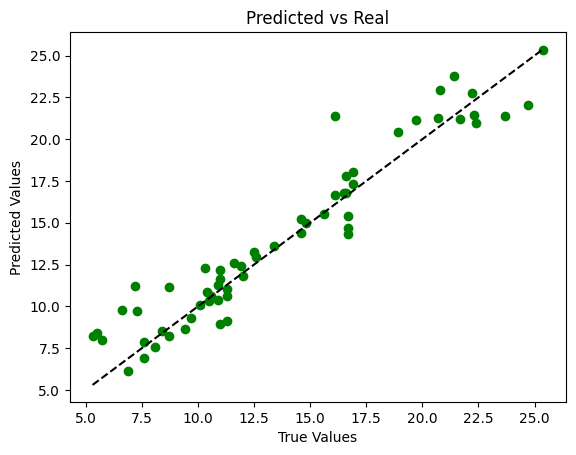

In [8]:
y_pred = model.predict(x_test)

plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # linha ideal
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Real")
plt.show()


In [9]:
model = HMLinearRegression()

model.fit(x_train, y_train, epochs=1000, verbose=0)

predict = model.predict(x_test)

mae = mean_absolute_error(y_test, predict)
print("MAE:", mae)

MAE: 1.1594906301345878


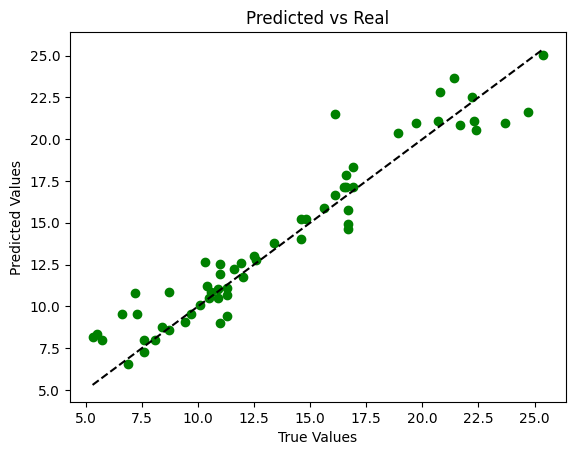

In [10]:
y_pred = model.predict(x_test)

plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # linha ideal
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Real")
plt.show()
